# Stock Market Prediction using CNN-LSTM model
This project is about analyzing the Stock Market and providing predictions to shareholders. For this, we use a CNN-LSTM approach to create an empty model, and then use it to train stock market data. Further implementation is discussed below...

In [3]:
import numpy as np
import pandas as pd
import os

# Data Preprocessing and Analysis

In [207]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Then the datasets are loaded

In [208]:
data = pd.read_csv('./abe.us.txt')
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,6.4987,6.6009,6.4668,6.5753,55766,0
1,2005-02-28,6.6072,6.7669,6.5944,6.6263,49343,0
2,2005-03-01,6.6391,6.6773,6.6072,6.6072,31643,0
3,2005-03-02,6.5753,6.6072,6.5434,6.5816,27101,0
4,2005-03-03,6.5753,6.6135,6.5562,6.5944,17387,0


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3190 entries, 0 to 3189
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     3190 non-null   object 
 1   Open     3190 non-null   float64
 2   High     3190 non-null   float64
 3   Low      3190 non-null   float64
 4   Close    3190 non-null   float64
 5   Volume   3190 non-null   int64  
 6   OpenInt  3190 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 174.6+ KB


In [210]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.0
mean,11.599416,11.712848,11.484610,11.605599,28444.870846,0.0
std,2.350376,2.365621,2.327065,2.341989,37525.175821,0.0
min,5.860300,5.905000,5.834700,5.841100,106.000000,0.0
25%,10.534000,10.655000,10.413750,10.554000,8147.750000,0.0
50%,11.981000,12.067000,11.899000,11.988500,17741.500000,0.0
75%,13.271000,13.386750,13.189000,13.295750,36167.250000,0.0
max,18.130000,19.151000,17.842000,17.925000,634041.000000,0.0


In [211]:
data.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

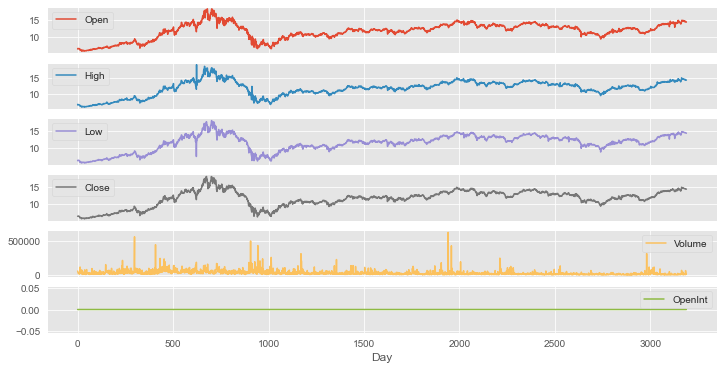

In [212]:
data.plot(legend=True, subplots=True, figsize=(12, 6), xlabel="Day")
plt.show()

In [213]:
data.shape

(3190, 7)

In [214]:
data.size

22330

In [215]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,3190,3190,2006-03-07,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,3190.0,NaN,NaN,NaN,11.599416,2.350376,5.8603,10.534,11.981,13.271,18.13
High,3190.0,NaN,NaN,NaN,11.712848,2.365621,5.905,10.655,12.067,13.38675,19.151
Low,3190.0,NaN,NaN,NaN,11.48461,2.327065,5.8347,10.41375,11.899,13.189,17.842
Close,3190.0,NaN,NaN,NaN,11.605599,2.341989,5.8411,10.554,11.9885,13.29575,17.925
Volume,3190.0,NaN,NaN,NaN,28444.870846,37525.175821,106.0,8147.75,17741.5,36167.25,634041.0
OpenInt,3190.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [216]:
data.dtypes

Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume       int64
OpenInt      int64
dtype: object

In [217]:
data.nunique() # Number of unique values in each columns

Date       3190
Open       1784
High       1843
Low        1789
Close      1864
Volume     2728
OpenInt       1
dtype: int64

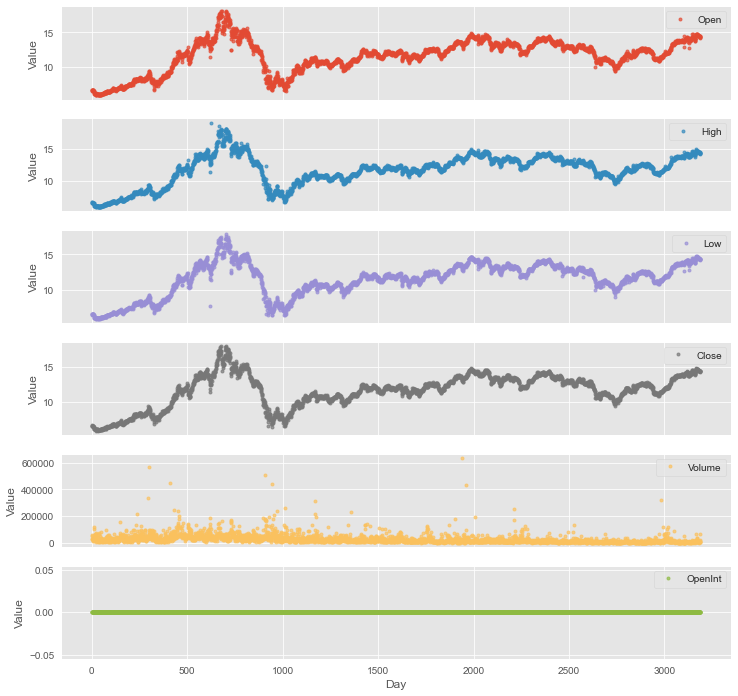

In [218]:
data.plot(
    marker='.', alpha=0.7, linestyle='None', 
    legend=True, subplots=True, figsize=(12, 12),
    xlabel='Day', ylabel='Value'
)
plt.show()

After that, we'll visualize the data for understanding, this is shown below...

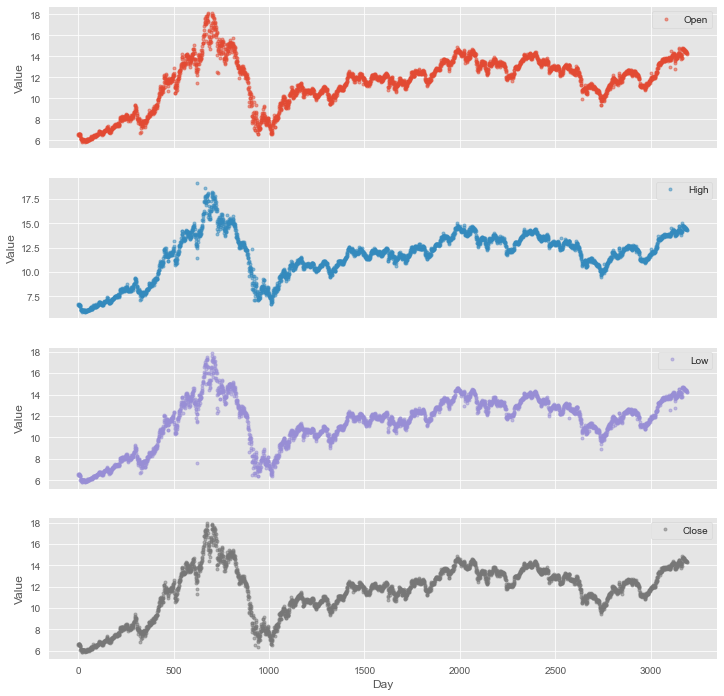

In [219]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(
    marker='.', alpha=0.5, linestyle='None', 
    legend=True, subplots=True, figsize=(12, 12),
    xlabel='Day', ylabel='Value'
)

Then we'd print the data after making changes and dropping null data

Text(0, 0.5, 'Opening price')

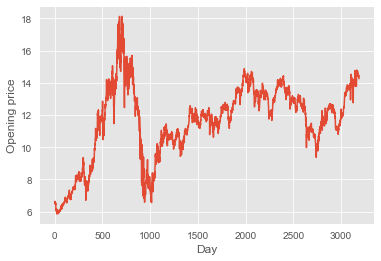

In [220]:
plt.plot(data['Open'], label="Open price")
plt.xlabel("Day")
plt.ylabel("Opening price")

In [221]:
df = data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,3190.0,11.599416,2.350376,5.8603,10.53400,11.9810,13.27100,18.130
High,3190.0,11.712848,2.365621,5.9050,10.65500,12.0670,13.38675,19.151
Low,3190.0,11.484610,2.327065,5.8347,10.41375,11.8990,13.18900,17.842
Close,3190.0,11.605599,2.341989,5.8411,10.55400,11.9885,13.29575,17.925
Volume,3190.0,28444.870846,37525.175821,106.0000,8147.75000,17741.5000,36167.25000,634041.000
OpenInt,3190.0,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.000


In [222]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,6.4987,6.6009,6.4668,6.5753,55766,0
1,2005-02-28,6.6072,6.7669,6.5944,6.6263,49343,0
2,2005-03-01,6.6391,6.6773,6.6072,6.6072,31643,0
3,2005-03-02,6.5753,6.6072,6.5434,6.5816,27101,0
4,2005-03-03,6.5753,6.6135,6.5562,6.5944,17387,0


The data has been analysed but it must be converted into data of shape [100,1] to make it easier for CNN to train on... Else it won't select necessary features and the model will fail

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = []
Y = []

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Open']])


window_size=100
for i in range(1, len(df) - window_size -1 , 1):
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append(df_scaled[i + j])
    temp2.append(df_scaled[i + window_size])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

After the dataset has been batched into 100 data per batch, the resulting batches will be split into train and test dataset.

In [243]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2470
618


# Training part

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers

In [244]:
# For creating model and training
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(
    optimizer='adam', 
    loss='mse', 
    metrics=['mse', 'mae']
)

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
62/62 [==============================] - 11s 47ms/step - loss: 0.0315 - mse: 0.0315 - mae: 0.1240 - val_loss: 0.0067 - val_mse: 0.0067 - val_mae: 0.0583
Epoch 2/40
62/62 [==============================] - 1s 20ms/step - loss: 0.0090 - mse: 0.0090 - mae: 0.0714 - val_loss: 0.0049 - val_mse: 0.0049 - val_mae: 0.0508
Epoch 3/40
62/62 [==============================] - 1s 20ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0644 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0459
Epoch 4/40
62/62 [==============================] - 1s 21ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0580 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0422
Epoch 5/40
62/62 [==============================] - 1s 19ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0565 - val_loss: 0.0056 - val_mse: 0.0056 - val_mae: 0.0597
Epoch 6/40
62/62 [==============================] - 1s 17ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0536 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0418
Epoch 7/40
62/62 [===

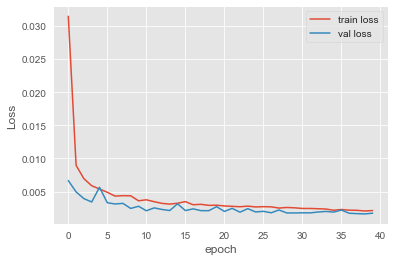

In [245]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

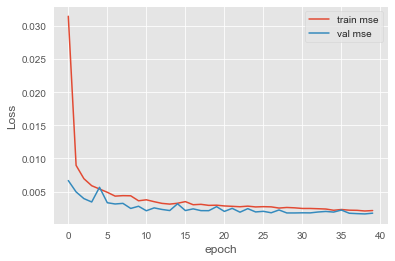

In [246]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

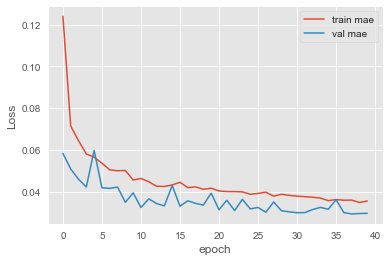

In [247]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_21 (TimeDi  (None, 1, 98, 64)        256       
 stributed)                                                      
                                                                 
 time_distributed_22 (TimeDi  (None, 1, 49, 64)        0         
 stributed)                                                      
                                                                 
 time_distributed_23 (TimeDi  (None, 1, 47, 128)       24704     
 stributed)                                                      
                                                                 
 time_distributed_24 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_25 (TimeDi  (None, 1, 21, 64)       

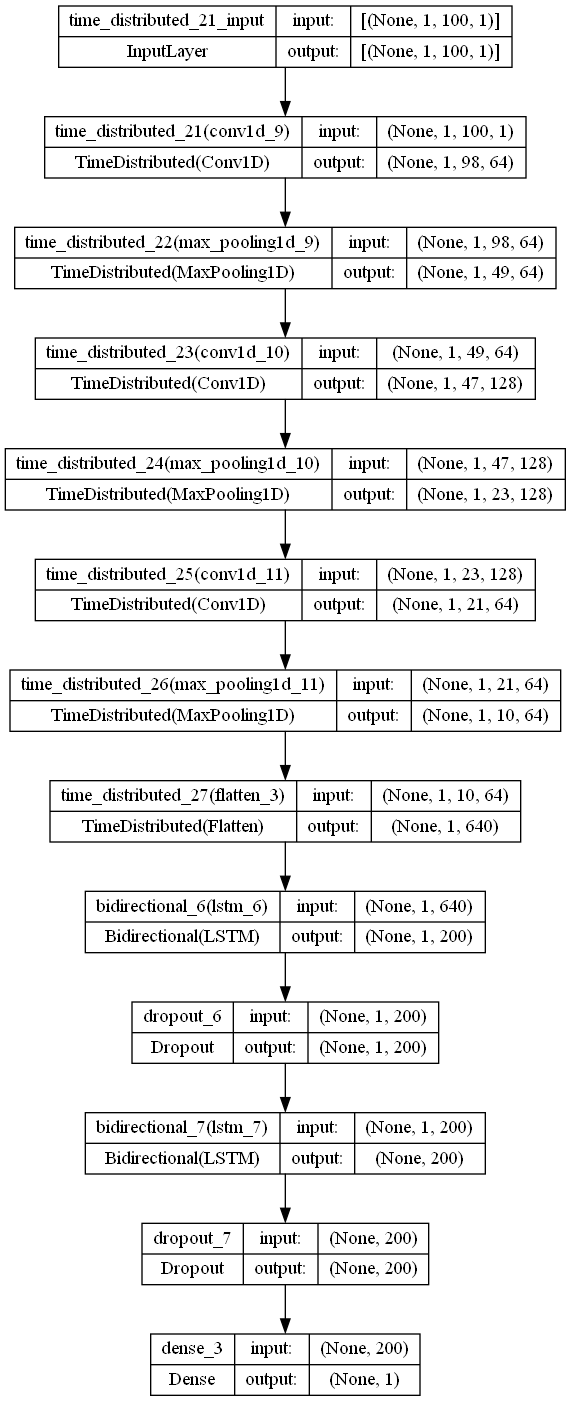

In [248]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [249]:
model.evaluate(test_X, test_Y)

20/20 [==============================] - 0s 5ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0295


[0.0017351930728182197, 0.0017351930728182197, 0.029529349878430367]

In [250]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.950144
R2 Score: 0.950144
Max Error: 0.201487


20/20 [==============================] - 0s 6ms/step


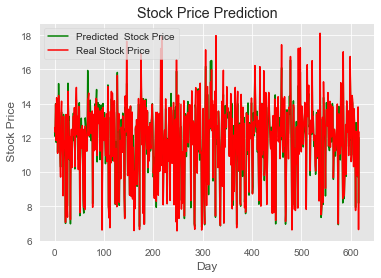

In [253]:
predicted  = scaler.inverse_transform(model.predict(test_X))
test_label = scaler.inverse_transform(test_Y.reshape(-1,1))
predicted = np.array(predicted[:,0]).reshape(-1,1)

plt.plot(predicted, color='green', label='Predicted  Stock Price')
plt.plot(test_label, color='red', label='Real Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Day')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [256]:
# First we need to save a model
model.save("model.h5")

### Predict training data and 60 day in the future data

In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [3]:
# Load model
model = tf.keras.models.load_model("./model.h5")

In [4]:
df = pd.read_csv('./abe.us.txt')

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,6.4987,6.6009,6.4668,6.5753,55766,0
1,2005-02-28,6.6072,6.7669,6.5944,6.6263,49343,0
2,2005-03-01,6.6391,6.6773,6.6072,6.6072,31643,0
3,2005-03-02,6.5753,6.6072,6.5434,6.5816,27101,0
4,2005-03-03,6.5753,6.6135,6.5562,6.5944,17387,0


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,3190.0,11.599416,2.350376,5.8603,10.53400,11.9810,13.27100,18.130
High,3190.0,11.712848,2.365621,5.9050,10.65500,12.0670,13.38675,19.151
Low,3190.0,11.484610,2.327065,5.8347,10.41375,11.8990,13.18900,17.842
Close,3190.0,11.605599,2.341989,5.8411,10.55400,11.9885,13.29575,17.925
Volume,3190.0,28444.870846,37525.175821,106.0000,8147.75000,17741.5000,36167.25000,634041.000
OpenInt,3190.0,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.000


In [7]:
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [8]:
df2 = df
days = 60
mean = df['Open'].mean()

for i in range(days):
    df2 = df2.append({'Open': mean}, ignore_index=True)
    
df2.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
3245,NaN,11.599416,NaN,NaN,NaN,NaN,NaN
3246,NaN,11.599416,NaN,NaN,NaN,NaN,NaN
3247,NaN,11.599416,NaN,NaN,NaN,NaN,NaN
3248,NaN,11.599416,NaN,NaN,NaN,NaN,NaN
3249,NaN,11.599416,NaN,NaN,NaN,NaN,NaN


The data has been analysed but it must be converted into data of shape [100,1] to make it easier for CNN to train on... Else it won't select necessary features and the model will fail

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = []
Y = []

scaler = MinMaxScaler()
df2_scaled = scaler.fit_transform(df2[['Open']])

window_size=100
for i in range(1, len(df2) - window_size -1 , 1):
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append(df2_scaled[i + j])
    temp2.append(df2_scaled[i + window_size])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

In [10]:
X_ori = np.array(X)
Y_ori = np.array(Y[:-days])

X_ori = X_ori.reshape(X_ori.shape[0],1,100,1)

99/99 [==============================] - 0s 4ms/step


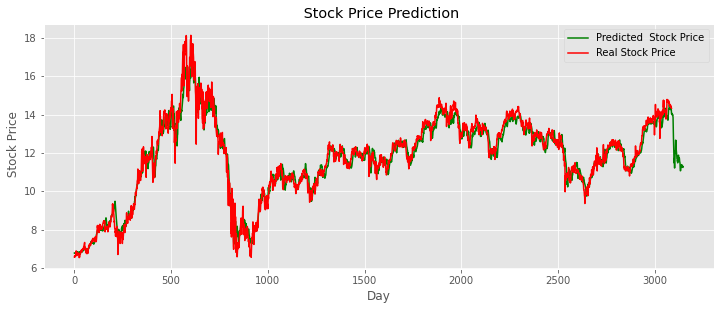

In [18]:
predicted  = scaler.inverse_transform(model.predict(X_ori))
real = scaler.inverse_transform(Y_ori.reshape(-1,1))
predicted = np.array(predicted[:,0]).reshape(-1,1)

plt.figure(figsize=(12,4.5))
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(real, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Day')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [12]:
model.evaluate(X_ori[:-days], Y_ori)

97/97 [==============================] - 2s 5ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0263


[0.0013179893139749765, 0.0013179893139749765, 0.026313018053770065]